<a href="https://colab.research.google.com/github/Fouziakulsum809/Fouzia-MRS/blob/main/TaxiFare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
d=pd.read_csv('TaxiFare (3).csv')

In [ ]:
d.shape

(50000, 8)

In [ ]:
d.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


to know the statistics of the data

In [ ]:
d.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


by using datatime splited data

In [ ]:
d['date_time_of_pickup']=pd.to_datetime(d['date_time_of_pickup'])

In [ ]:
d['year']=d['date_time_of_pickup'].dt.year
d['month']=d['date_time_of_pickup'].dt.month
d['date']=d['date_time_of_pickup'].dt.day
d['hour']=d['date_time_of_pickup'].dt.hour
d['day']=d['date_time_of_pickup'].dt.dayofweek
d['min']=d['date_time_of_pickup'].dt.minute

In [ ]:
d.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,date,hour,day,min
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0,26
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1,52
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3,35
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5,30
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1,51


In [ ]:
d=d[d['no_of_passenger']>0]

In [ ]:
d=d[d['amount']>0]

In [ ]:
d=d[d['latitude_of_pickup']<90]

In [ ]:
d.isna().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
year                    0
month                   0
date                    0
hour                    0
day                     0
min                     0
dtype: int64

to calculate the distance using latitude and longitude points

In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(row):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1 = row['longitude_of_pickup']
    lat1 = row['latitude_of_pickup']
    lon2 = row['longitude_of_dropoff']
    lat2 = row['latitude_of_dropoff']

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6367 * c
    return km


In [ ]:
d['distance'] = d.apply(haversine, axis=1)

In [ ]:
d.drop(['unique_id','date_time_of_pickup','longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'],axis=1,inplace=True)

In [ ]:
d.head(10)

,amount,no_of_passenger,year,month,date,hour,day,min,distance
0,4.5,1,2009,6,15,17,0,26,1.030117
1,16.9,1,2010,1,5,16,1,52,8.444828
2,5.7,2,2011,8,18,0,3,35,1.388653
3,7.7,1,2012,4,21,4,5,30,2.797513
4,5.3,1,2010,3,9,7,1,51,1.997902
5,12.1,1,2011,1,6,9,3,50,3.784861
6,7.5,1,2012,11,20,20,1,35,1.554830
7,16.5,1,2012,1,4,17,2,22,4.152835
8,9.0,1,2012,12,3,13,0,10,1.252445
9,8.9,2,2009,9,2,1,2,11,2.847838


In [ ]:
d.dtypes

amount             float64
no_of_passenger      int64
year                 int64
month                int64
date                 int64
hour                 int64
day                  int64
min                  int64
distance           float64
dtype: object

In [ ]:
d.describe()

,amount,no_of_passenger,year,month,date,hour,day,min,distance
count,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000
mean,11.373212,1.673437,2011.740151,6.275946,15.671631,13.487807,3.029945,29.668118,17.682781
std,9.693602,1.287799,1.865203,3.460644,8.660797,6.508598,1.957200,17.308806,345.281717
min,0.010000,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,2010.000000,3.000000,8.000000,9.000000,1.000000,15.000000,1.222054
50%,8.500000,1.000000,2012.000000,6.000000,16.000000,14.000000,3.000000,30.000000,2.118686
75%,12.500000,2.000000,2013.000000,9.000000,23.000000,19.000000,5.000000,45.000000,3.893722
max,200.000000,6.000000,2015.000000,12.000000,31.000000,23.000000,6.000000,59.000000,8662.376766


dat visualization

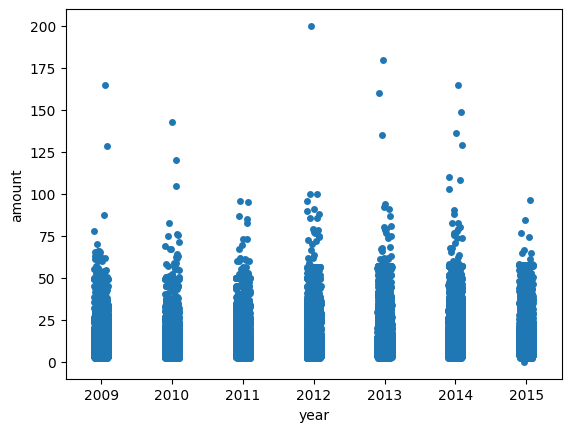

In [ ]:
sns.stripplot(x='year',y='amount',data=d)
plt.show()

<Axes: >

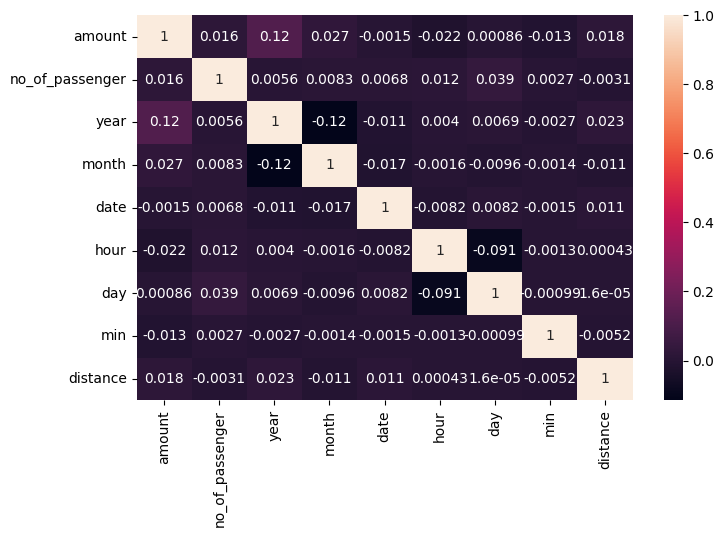

In [ ]:
fig, ax =plt.subplots(figsize=(8,5))
sns.heatmap(d.corr(),annot=True,ax=ax)

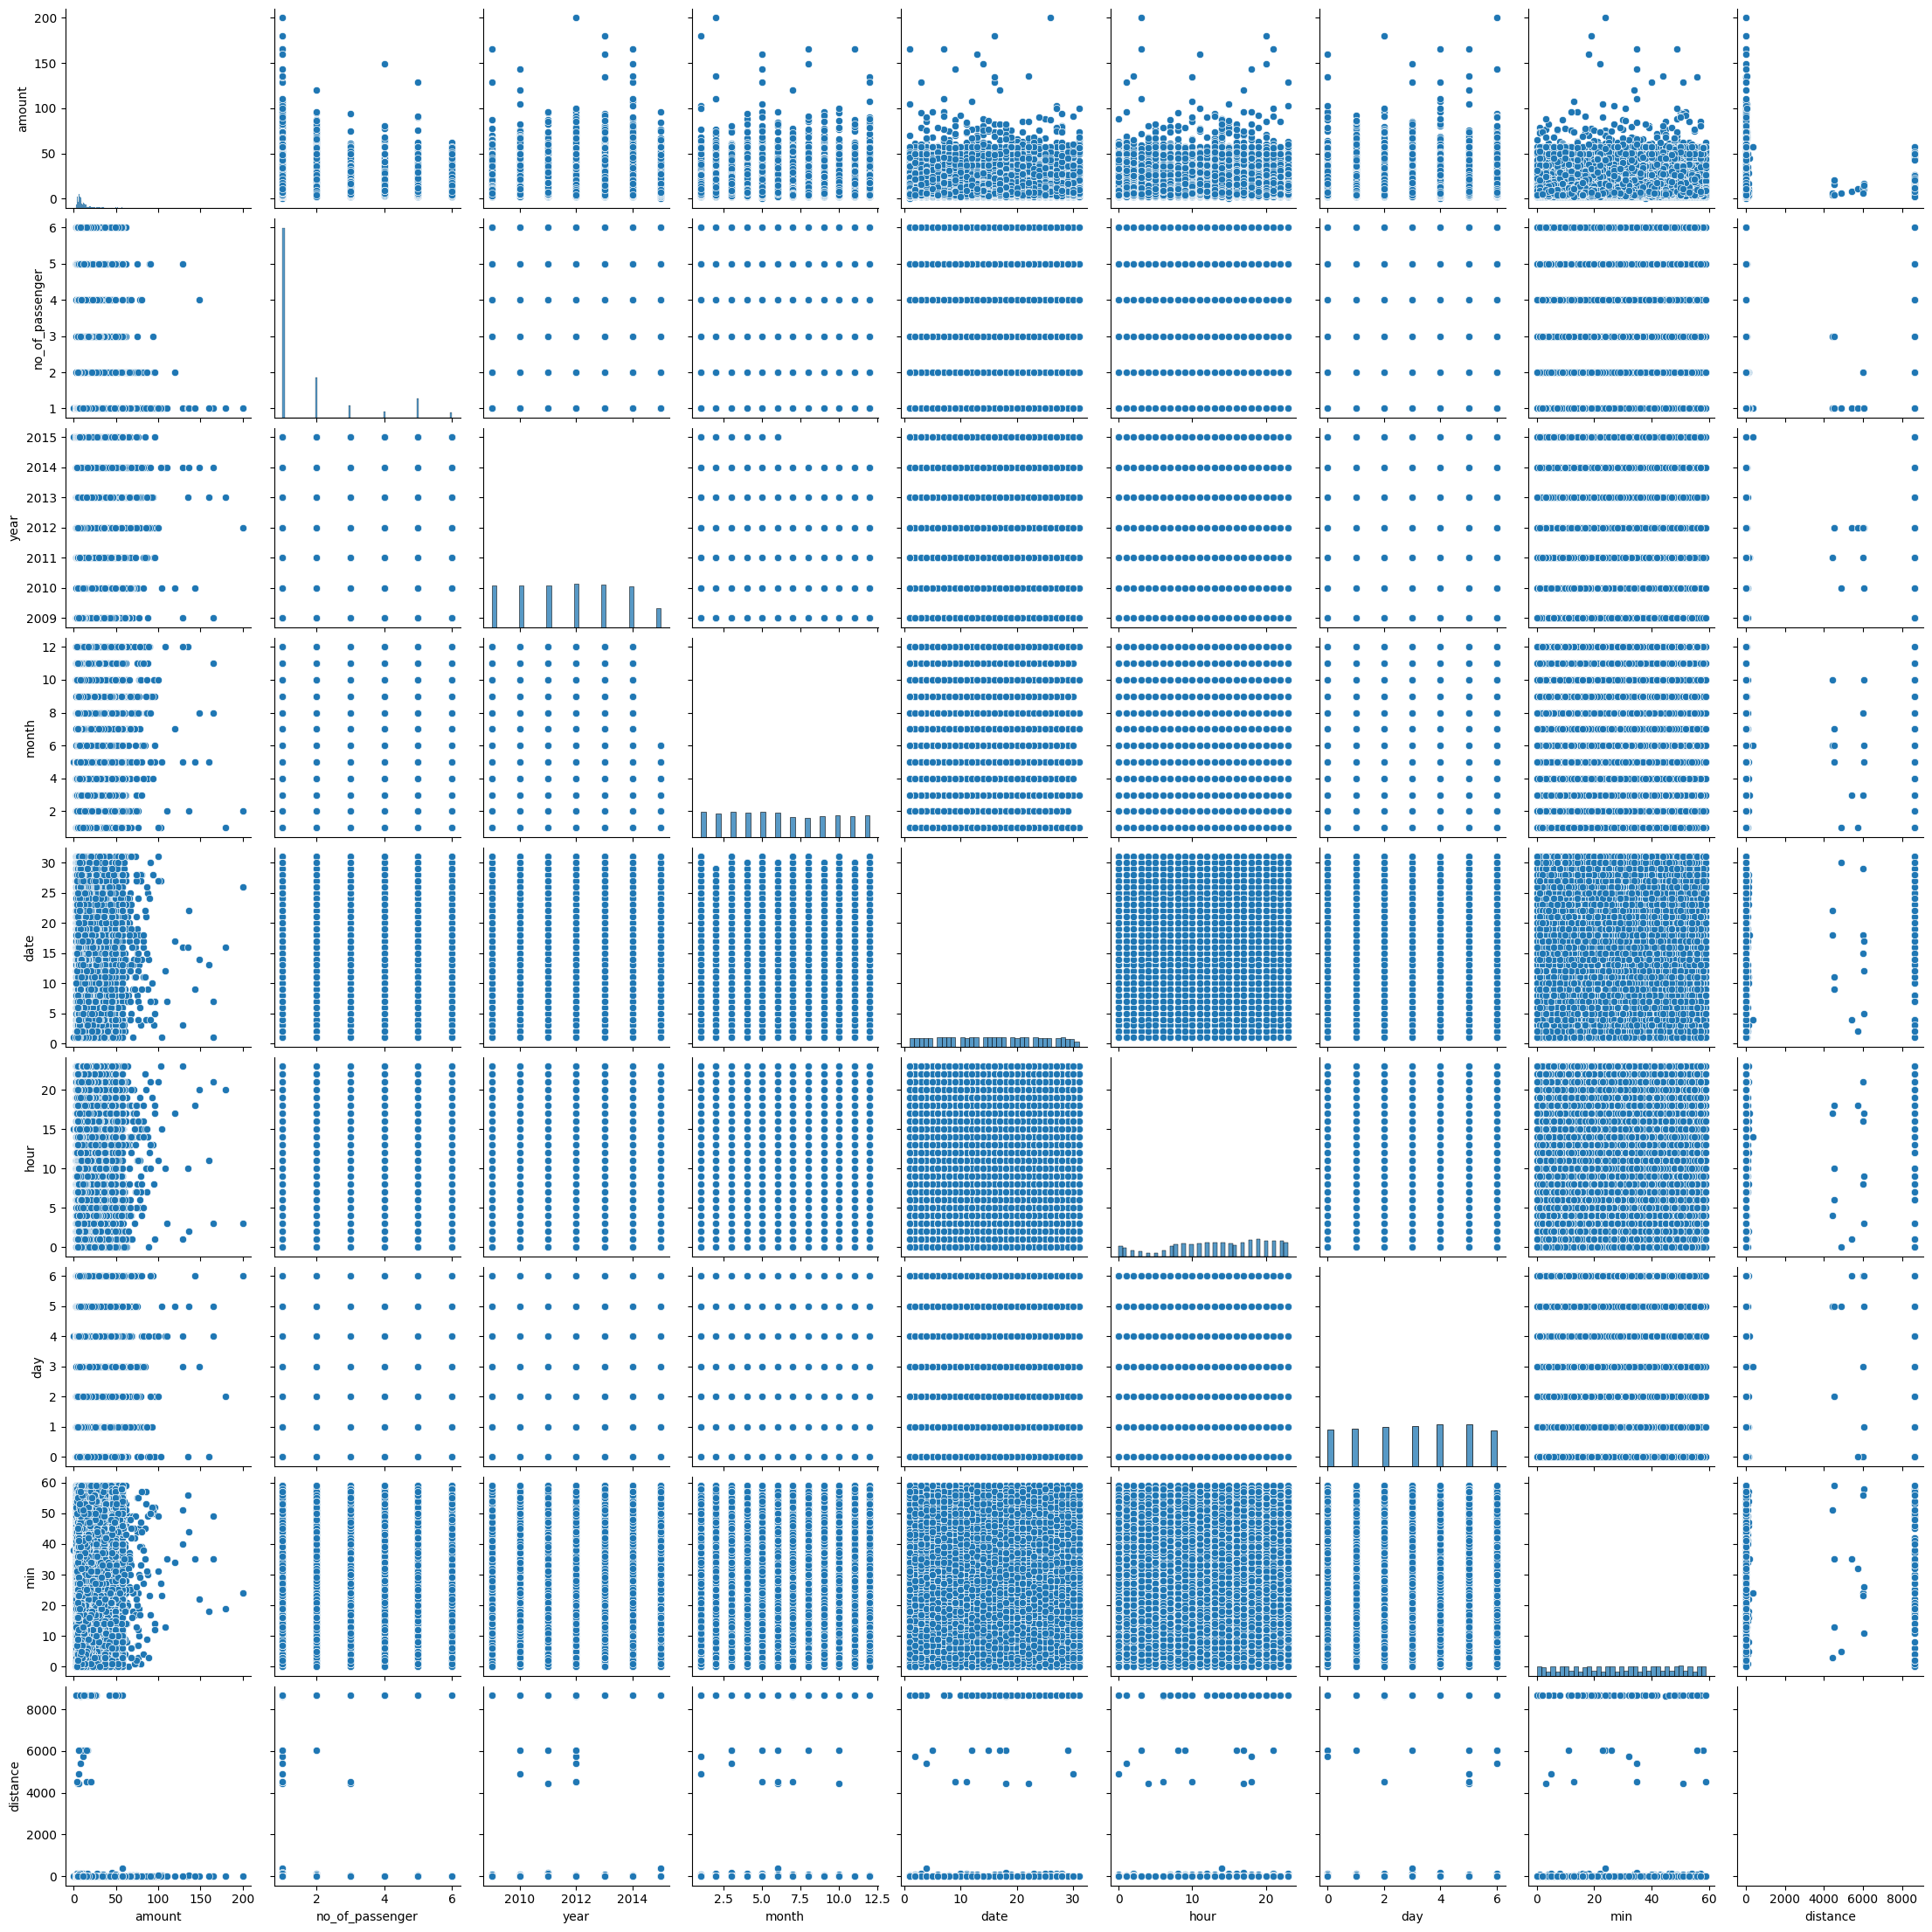

In [ ]:
sns.pairplot(d)

model bulding

In [ ]:
from sklearn.model_selection import train_test_split
x=d.drop('amount',axis=1)
y=d[['amount']]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
m=ExtraTreesRegressor(n_estimators=25)
m.fit(X_train,y_train)

<ipython-input-37-999b7c8729c1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(X_train,y_train)


ExtraTreesRegressor(n_estimators=25)

In [ ]:
m.score(X_train,y_train)

1.0

In [ ]:
m.score(X_test,y_test)

0.6878815651831994

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=8)
rf.fit(X_train,y_train)

<ipython-input-40-df20684ffceb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor(n_estimators=8)

In [ ]:
rf.score(X_train,y_train)

0.9454549900850353

In [ ]:
rf.score(X_test,y_test)

0.6790730703397547

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
dt.score(X_train,y_train)

1.0

In [ ]:
dt.score(X_test,y_test)

0.4340861782543747